# Splines, Take Two!

## What are splines? 

Fun fact! The name "spline" comes from a tool used to create curves, like for drafting and boatbuilding. Leroy Jethro Gibbs probably uses them a lot.

<figure>
    <img src="http://alatown.com.s30748.gridserver.com/wp-content/uploads/2000/01/03-spline.jpg", height="300", width="400">
    <figcaption>Hooked weights, called “ducks,” accurately secure a spline – here, no more than a thin strip of balsa – for tracing the hull of a sailing vessel.</figcaption>
</figure>

Now for the mathy thing. According to Wikipedia:
> A spline is a numeric function that is piecewise-defined by polynomial functions, and which possesses a high degree of smoothness at the places where the polynomial pieces connect (which are known as knots).

So something like:
$$
S(t) = \left\{
        \begin{array}{ll}
            t^3, & \quad t \geq 0 \\
            -t^3, & \quad t < 0
        \end{array}
    \right.
$$

Or a more complex example:
<figure>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Quadratic_spline_six_segments.svg/320px-Quadratic_spline_six_segments.svg.png">
    <figcaption>Here is a quadratic spline composed of six polynomial segments. Between point 0 and point 1 a straight line. Between point 1 and point 2 a parabola with second derivative = 4. Between point 2 and point 3 a parabola with second derivative = −2. Between point 3 and point 4 a straight line. Between point 4 and point 5 a parabola with second derivative = 6. Between point 5 and point 6 a straight line.</figcaption>
</figure>

$$
S(t) = \left\{
        \begin{array}{ll}
            C_0, & \quad t_0 \leq t < t_1 \\
            2t^2 + C_1, & \quad t_1 \leq t < t_2 \\
            -t^2 + C_2, & \quad t_2 \leq t < t_3 \\
            -mx + C_3, & \quad t_3 \leq t < t_4 \\
            3t^2 + C_4, & \quad t_4 \leq t < t_5 \\
            C_0, & \quad t_5 \leq t \leq t_6
        \end{array}
    \right.
$$

## Why use them?

It gives similar results to polynomial regression without Runge's phenomenon!

<figure>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0a/Runge_phenomenon.svg/480px-Runge_phenomenon.svg.png">
    <figcaption>The red curve is the Runge function.
The blue curve is a 5th-order interpolating polynomial (using six equally spaced interpolating points).
The green curve is a 9th-order interpolating polynomial (using ten equally spaced interpolating points).</figcaption>
</figure>

## Mathematical formalism

A spline is a piecewise polynomial real function on an interval $[a, b]$:   
$$ S:[a, b] \rightarrow \rm I\!R $$

It has $k$ subintervals $[t_{i-1}, t_i]$ (the piecewise part):  
$$ a = t_0 < t_1 < t_2 < \ldots < t_{k-1} < t_k = b $$

The function has to be a polynomial in all the intervals:
$$ P_i: [t_{i-1}, t_i] \rightarrow \rm I\!R $$

So the final function looks like:
$$
S(x) = \left\{
        \begin{array}{ll}
            P_1(x), & \quad t_0 \leq x < t_1 \\
            P_2(x), & \quad t_1 \leq x < t_2 \\
            \vdots \\
            P_k(x), & \quad t_{k-1} \leq x \leq t_k
        \end{array}
    \right.
$$

The highest degree polynomial is the degree of the spline, $n$. The order of the spline is $n+1$.

To make $S$ smooth (important for computing!!!), the derivatives up to order $n-1$ need to be continuous. For this example:
$$
S(x) = \left\{
        \begin{array}{ll}
            C_0, & \quad t_0 \leq x < t_1 \\
            2x^2 + C_1, & \quad t_1 \leq x < t_2 \\
            -x^2 + C_2, & \quad t_2 \leq x < t_3 \\
            -mx + C_3, & \quad t_3 \leq x < t_4 \\
            3x^2 + C_4, & \quad t_4 \leq x < t_5 \\
            C_0, & \quad t_5 \leq x \leq t_6
        \end{array}
    \right.
$$
the degree of the spline is $n=2$. So all the first derivatives need to be continuous. This means that, for all the knots, the values have to be equal from the left and right and the derivative from the right has to equal the derivative from the left:
\begin{align*}
    P_{i-1}(t_i) = P_{i}(t_i) \\
    P^\prime_{i-1}(t_i) = P^\prime_{i}(t_i)
\end{align*}

For knot 1:
\begin{equation}
    C_0 = 2t^2_1 + C_1 \\
    \frac {d(C_0)} {dx} \bigg\rvert_{x=t_1} = \frac {d(2x^2 + C_1)} {dx} \bigg\rvert_{x=t_1} \\
     0 = 4t_1 + C_1
\end{equation}

## How to fit to them: the intuition

### Spline interpolation, i.e. connect the dots
**Note:** Interpolation means you just want to connect your points in a way that you can interpolate values between data points and you don't care how smooth the resulting curve is. Thus, spline interpolation uses each data point as a knot.  
**Corollary:** By using each data point as a knot, we are essentially claiming that our data points are the ground truth (i.e. they have no scatter).

Everybody says cubic splines are the best, so lets go with a cubic spline. Say we have 4 data points, so 4 knots.
$$
S(x) = \left\{
        \begin{array}{ll}
            C_1 + m_1x + n_1x^2 + p_1x^3, & \quad t_0 \leq x < t_1 \\
            C_2 + m_2x + n_2x^2 + p_2x^3, & \quad t_1 \leq x \leq t_2 \\
            C_3 + m_3x + n_3x^2 + p_3x^3, & \quad t_2 \leq x < t_3
        \end{array}
    \right.
$$

Here's all the equalities we know:
    \begin{equation}
        C_1 + m_1t_0 + n_1t^2_0 + p_1t^3_0 = y_0 \\
        C_1 + m_1t_1 + n_1t^2_1 + p_1t^3_1 = y_1 \\
        C_2 + m_2t_1 + n_2t^2_1 + p_2t^3_1 = y_1 \\
        m_1 + 2n_1t_1 + 3p_1t^2_1 = m_2 + 2n_2t_1 + 3p_2t^2_1 \\
        2n_1 + 6p_1t_1 = 2n_2 + 6p_2t_1 \\
        C_2 + m_2t_2 + n_2t^2_2 + p_2t^3_2 = y_2 \\
        C_3 + m_3t_2 + n_3t^2_2 + p_3t^3_2 = y_2 \\
        C_3 + m_3t_3 + n_3t^2_3 + p_3t^3_3 = y_3 \\
        m_2 + 2n_2t_2 + 3p_2t^2_2 = m_3 + 2n_3t_2 + 3p_3t^2_2 \\
        2n_2 + 6p_2t_2 = 2n_3 + 6p_3t_2 \\
    \end{equation}

That's 10 equations to figure out 12 unknown parameters. We still need 2 more equations. This is done by setting a derivative equal to 0 at the end knots. The most common one is the second derivative because this corresponds physically to a spline with ends that are free to move. This is why it is called "natural" boundary conditions. So, the last two equations are:
\begin{equation}
    2n_1 + 6p_1t_0 = 0 \\
    2n_3 + 6p_3t_3 = 0
\end{equation}

Now we can solve it like a normal system of equations with $\mathbf{Ax} = \mathbf{y}$. Yay, boundary contitions!

### Spline fitting, i.e. more data points than knots
**Note:** Now we are assuming that our data has scatter and we are fitting the data to splines, not interpolating.

All the interpolation equations still apply, but now there are additional $y_i$'s to add. With just 2 more data points than knots, the end boundary conditions don't need to be chosen anymore. Now this is just a more complicated regression example. It can be solved through minimizing a cost function with optional regularization.

## How to fit to them: the algorithms

### B-splines
In the above example, we represented the spline with the spanning set $\{t_0, t, t^2, t^3\}$. A spanning set is just a set of vectors that can be linearly combined to reproduce the vector space, e.g. all third order polynomials can be written as $at_0 + bt + ct^2 + dt^3$. However, this set is correlated, or lienarly dependent. Most matrix math needs a basis set, a linearly independent spanning set. That means that none of the vectors are linear combinations of the others, or they are uncorrelated, or they are orthogonal. For example, a basis set for $\rm I\!R^2$ is $\{[1,0],[0,1]\}$.

There are a special set of polynomials that can be used to form a basis set of splines, called B-splines. The form of the B-splines is not important; what is important is that any spline $S(t)$ can be written as a unique combination of B-splines, $B(t)$:
$$ S(x) = \sum_{i=-n}^{k-1} c_iB_{i,n+1}(x) $$  
where $c_i$ are the B-spline coefficients. Notice that, for $k$ intervals, you need $n+k+1$ B-splines.

### Splines in scipy.interpolate (wrapper around FITPACK Fortran package)
* Procedural
    * ```splrep()```
* Object-oriented (Deb recommended)
    * ```UnivariateSpline()```
    * ```InterpolatedUnivariateSpline()```
    * ```LSQUnivariateSpline()```  

Requires x data to be ordered!!! Also uses "not-a-knot" conditions for the end knots: $P'''_1(t_1) = P'''_2(t_1)$ and $P'''_{k-1}(t_{k-1}) = P'''_k(t_{k-1})$

#### Fitting and smoothing with automatic knot placement, ```UnivariateSpline()```
New problem:  
Minimize
$$ \tilde{\eta} := \sum_{i=1}^{k-1} \Big(s^{(n)}(t_i+) - s^{(n)}(t_i-) \Big)^2 $$
subject to the constraint 
$$ \chi^2 = \sum_{r=1}^{m} \Big(w_r y_r - w_r \sum_{i=-n}^{k-1} c_iB_{i,n+1}(x_r) \Big)^2 \leq S $$  
where $S$ is a positive number called the smoothing parameter.

The first equation captures how non smooth the curve is, while the second captures goodness of fit. $S$ is a parameter that controls the tradeoff between the two. It also influences how many knots get used and where they are placed. The nice thing is we know how to solve this type of problem. Another nice thing is that there is a unique $S(x)$ for each value of $S$.

#### Interpolation, ```InterpolatedUnivariateSpline()```
When $S=0$, you don't get any smoothing and all the data points become knots, which is the same as interpolating.

#### Least squares fitting with fixed knots, ```LSQUnivariateSpline()```
This is just your typical minimize the sum of squares problem. For $(x_r, y_r), r=1,...,m$:
$$ \min_{\chi^2}: \chi^2 = \sum_{r=1}^{m} \Big(w_r y_r - w_r \sum_{i=-n}^{k-1} c_iB_{i,n+1}(x_r) \Big)^2 $$

## Code!

In [1]:
%matplotlib inline

In [2]:
from scipy.interpolate import UnivariateSpline, LSQUnivariateSpline, InterpolatedUnivariateSpline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [9,6]
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
plt.rcParams['lines.markeredgewidth'] = 2
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.labelsize'] = 14

In [3]:
data = pd.read_csv('macro.csv', index_col=False)
data = data.sort_values(['trade']) #VERY IMPORTANT TO SORT BY X!!!!!
data.head()

,country,year,gdp,unem,capmob,trade
0,United States,1966,5.111141,3.8,0,9.622906
1,United States,1967,2.277283,3.8,0,9.983546
2,United States,1968,4.700000,3.6,0,10.089120
3,United States,1969,2.800000,3.5,0,10.435930
4,United States,1970,-0.200000,4.9,0,10.495350


In [4]:
X = data['trade'].values
y = data['gdp'].values

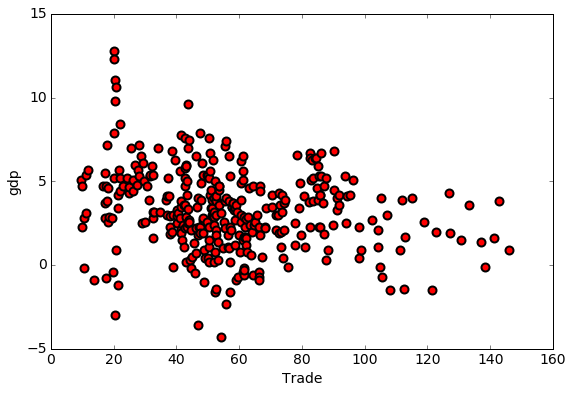

In [5]:
plt.plot(X, y, 'ro')
plt.xlabel('Trade')
plt.ylabel('gdp')

In [6]:
k = 3 #determines spline order

### ```UnivariateSpline()```

In [7]:
smooth_fit = UnivariateSpline(X, y, k=k) #default S is len(X)

In [8]:
X.shape

(350,)

In [9]:
y_fit = smooth_fit(X)

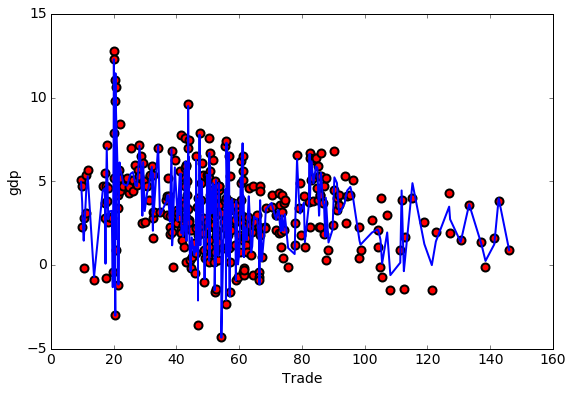

In [10]:
plt.plot(X, y, 'ro', X, y_fit)
plt.xlabel('Trade')
plt.ylabel('gdp')

In [11]:
smooth_fit2 = UnivariateSpline(X, y, k=k, s=1000) #default S is len(X)

In [12]:
y_fit2 = smooth_fit2(X)

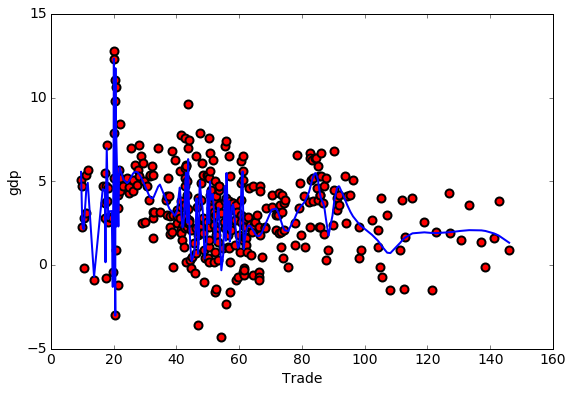

In [13]:
plt.plot(X, y, 'ro', X, y_fit2)
plt.xlabel('Trade')
plt.ylabel('gdp')

### ```InterpolatedUnivariateSpline()```

In [14]:
interp_fit = InterpolatedUnivariateSpline(X, y, k=k)

In [15]:
y_fit = interp_fit(X)

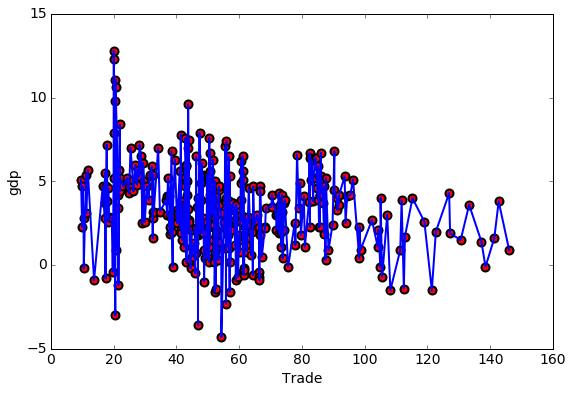

In [16]:
plt.plot(X, y, 'ro', X, y_fit)
plt.xlabel('Trade')
plt.ylabel('gdp')

### ```LSQUnivariateSpline()```

In [17]:
knots = smooth_fit2.get_knots()
#using knots from UnivariateSpline because I couldn't figure out how to satisfy the Schoenberg-Whitney condition

In [18]:
lsq_fit = LSQUnivariateSpline(X, y, knots[1:-1], k=k)

In [19]:
y_fit = lsq_fit(X)

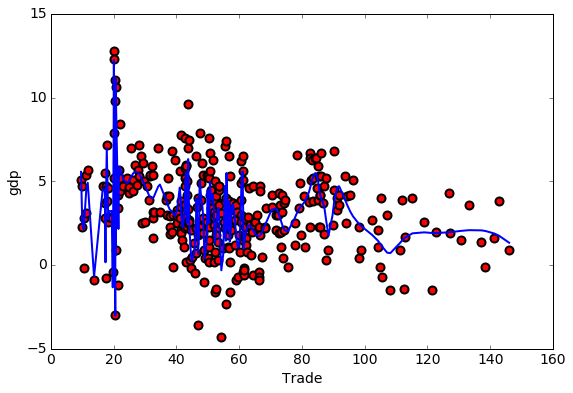

In [20]:
plt.plot(X, y, 'ro', X, y_fit)
plt.xlabel('Trade')
plt.ylabel('gdp')